# Prithvi burn scars detection demo

Introducing Prithvi, an innovative temporal Vision Transformer jointly developed by the [collaborative efforts of IBM and NASA](https://www.earthdata.nasa.gov/news/impact-ibm-hls-foundation-model). This groundbreaking model was pretrained using continental US Harmonised Landsat Sentinel 2 (HLS) data. The focus of this demo is to highlight the model's refinement in detecting burn scars. Further details can be explored [here](https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M-burn-scar).

To facilitate burn scar detection, users are required to provide an HLS array that encompasses the following reflectance channels (ranging from 0 to 1): Blue, Green, Red, Narrow NIR, SWIR 1, and SWIR 2.

## Methodology

This demonstration employs a fine-tuned version of the Prithvi model to identify instances of burn scars in new data presented in a numpy array format. By way of illustration, we will employ this model to detect burn scars within the [`IFArafoCandelaria` fire](https://www.copernicus.eu/en/media/image-day-gallery/ifarafocandelaria-fire-still-burning-tenerife) in Tenerife.

The input data will be retrieved from the CMR-STAC API. The process involves searching for a specific subset by defining a region of interest and a designated time frame, all of which are tailored to suit our particular use case.

- **Daily 30 meter (m) global HLS Sentinel-2 Multi-spectral Instrument Surface Reflectance - [HLSS30.002](https://doi.org/10.5067/HLS/HLSS30.002)**
    - _The HLSS30 product provides 30 m Nadir normalized Bidirectional Reflectance Distribution Function (BRDF)-Adjusted Reflectance (NBAR) and is derived from Sentinel-2A and Sentinel-2B MSI data products._  
     - **Science Dataset (SDS) layers:** 
        - B12 (SWIR 2) 
        - B12 (SWIR 1) 
        - B8A (NIR Narrow)  
        - B04 (Red)   
        - B03 (Green) 
        - B02 (Blue) 


- **Daily 30 meter (m) global HLS Landsat-8 OLI Surface Reflectance - [HLSL30.002](https://doi.org/10.5067/HLS/HLSL30.002)**
    - _The HLSL30 product provides 30 m Nadir normalized Bidirectional Reflectance Distribution Function (BRDF)-Adjusted Reflectance (NBAR) and is derived from Landsat-8 OLI data products._  
     - **Science Dataset (SDS) layers:**  
        - B07 (SWIR 2)  
        - B06 (SWIR 1)
        - B05 (NIR) 
        - B04 (Red) 
        - B03 (Green) 
        - B02 (Blue)  

## Setup

### Library import

In [1]:
import sys

# Include local library paths 
sys.path.append("../src/")

from map_interaction import LeafletMap  
from data_search import CMRSTACCatalog
from data_extraction import COGExtractor

## Data
### Draw a rectangle on map to select and area

In [2]:
map = LeafletMap()
map

Draw a rectangle on map to select and area.


LeafletMap(center=[28.3904, -16.4409], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…

### Search items on the CMR-STAC API

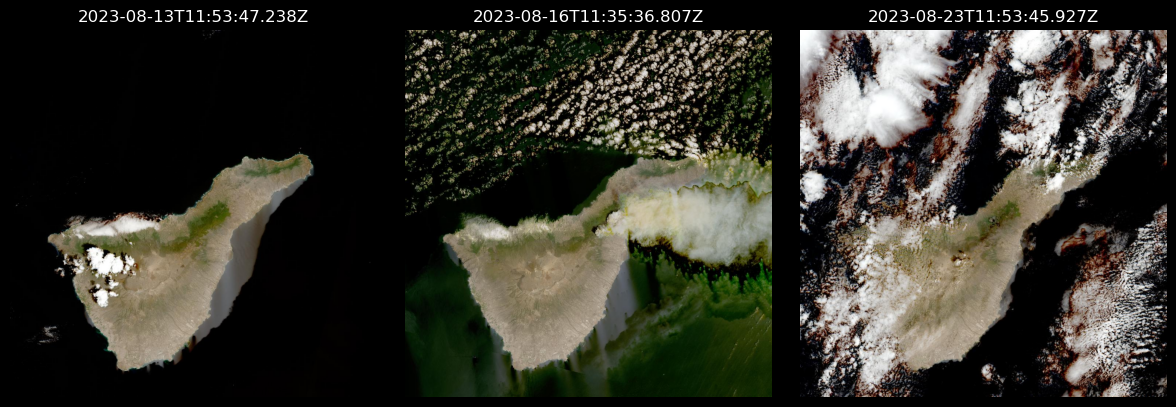

In [3]:
# Create and instance of a CMR STAC catalog
catalog = CMRSTACCatalog()

# Search for items of interest:
items = catalog.search(bbox=map.bbox, start_date='2023-08-13', end_date='2023-08-31')

# Display RGB images of all items in a single plot
catalog.display_rgb_images(items)

### Extracting HLS COGs from the Cloud

GDAL configurations set successfully.
Authentication to NASA Earthdata Login credentials set successfully.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


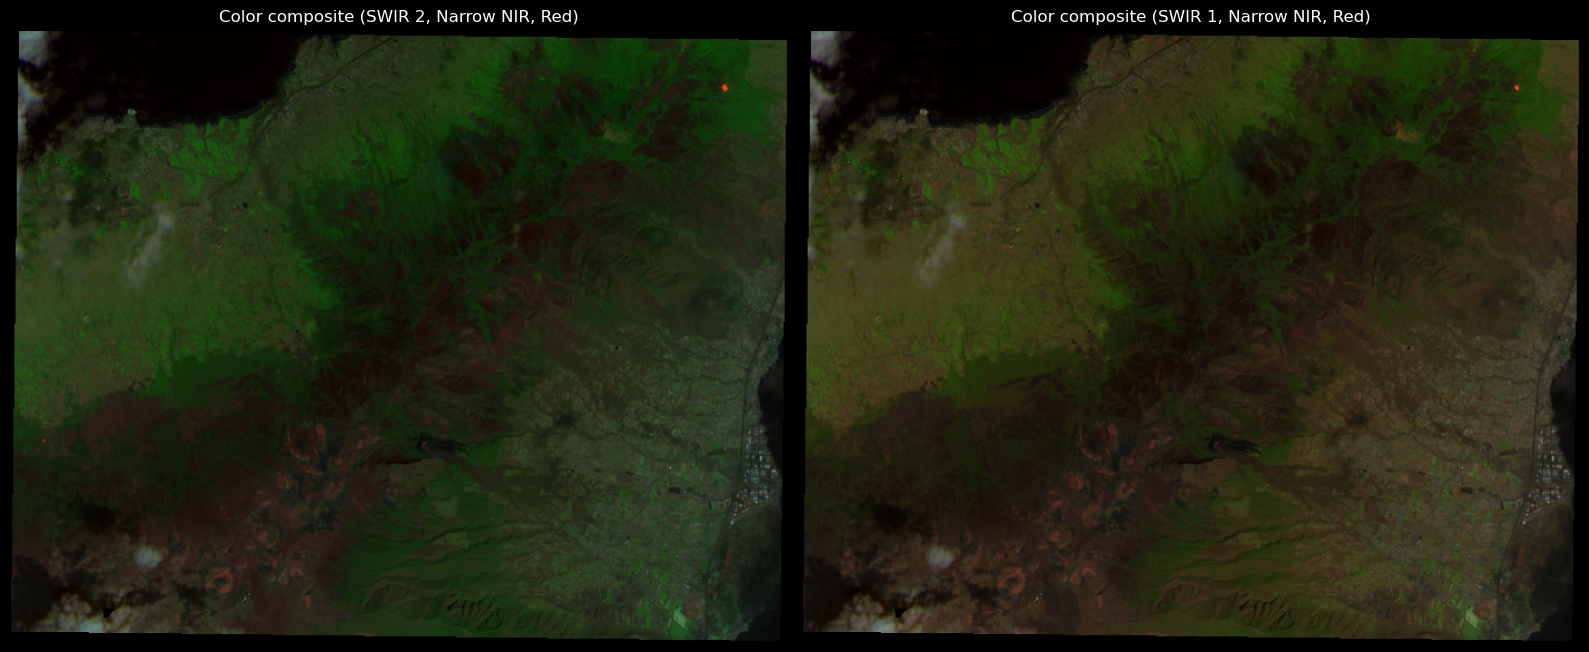

In [4]:
# Initialize COGExtractor
cog_extractor = COGExtractor(items[2], map.polygon)  

# Get data
band_data = cog_extractor.get_data()

# Display composites
cog_extractor.display_composites(band_data)